## Group: The Order of the PyTorch
### Milestone 1

- Members: Onur Buyukkalkan, Yi-Huai Chang, Diyanet Nijiati

- Project: Costa Rica Household Poverty Prediction

https://www.kaggle.com/competitions/costa-rican-household-poverty-prediction/overview 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

C:\Users\onurc\AppData\Local\Temp\ipykernel_28380\1825103310.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Step 1: Initial Exploration

In [2]:
#Load and Explore the Data
data = pd.read_csv('train.csv')
print(data.head())
print(data.describe())

             Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0  ...          100    1849               1        100             0   
1     0  ...          144    4489               1        144             0   
2     0  ...          121    8464               1          0             0   
3     0  ...           81     289              16        121             4   
4     0  ...          121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Tar

In [3]:
#Checking Shape and NA Values Across Columns
print("Data shape:", data.shape)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None) 
print(data.isnull().sum())

#v2a1, v18q1, rez_esc have too many null values, is this a problem?

Data shape: (9557, 143)
Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64


In [4]:
#Counts of the Target Labels
print(data['Target'].value_counts())

Target
4    5996
2    1597
3    1209
1     755
Name: count, dtype: int64


## Step 2: Plotting

We should now visualize the data

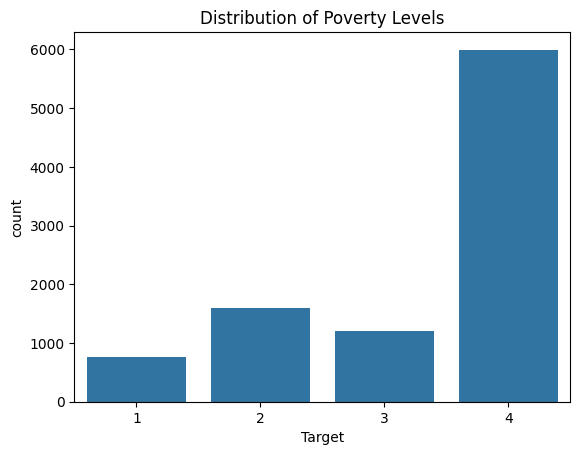

In [5]:
# Plotting the distribution of the poverty levels
sns.countplot(x='Target', data=data)
plt.title('Distribution of Poverty Levels')
plt.show()

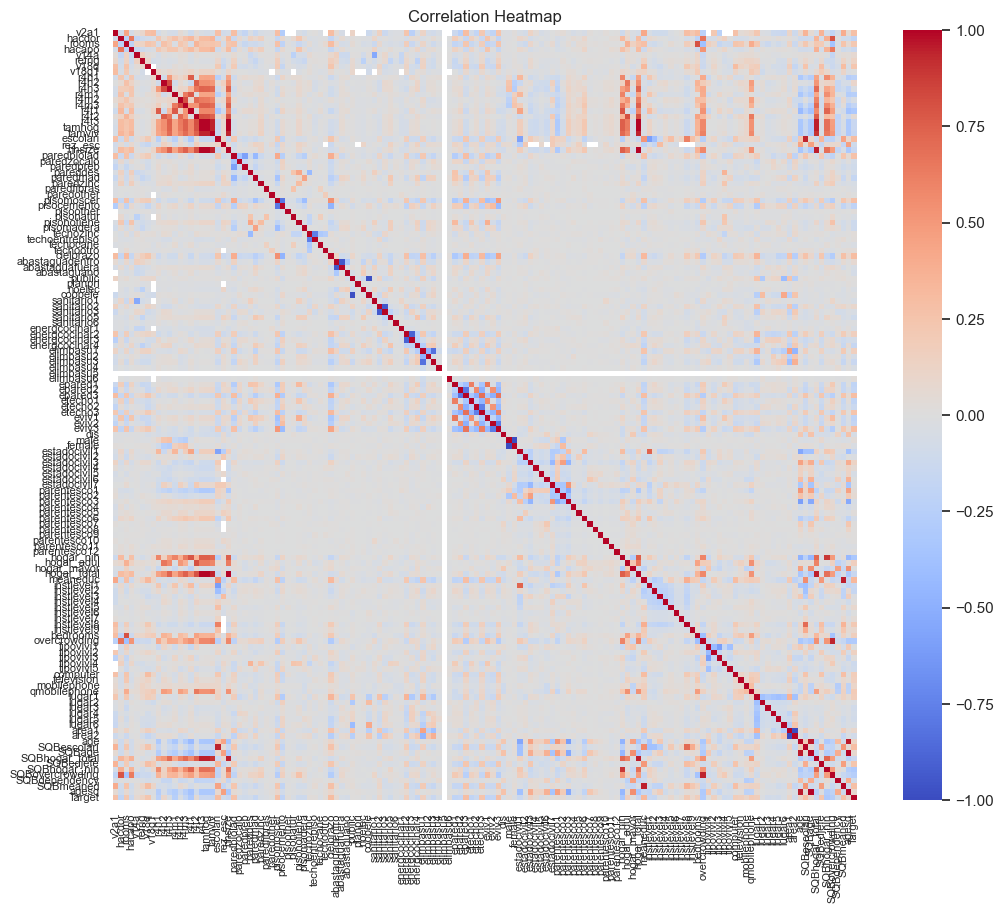

In [6]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # np.number covers integers and floats

# Now compute the correlation matrix
corr_matrix = numeric_data.corr()

# Assuming 'corr_matrix' is your correlation matrix
sns.set(style="white")  # Set style to 'white' to ensure labels are clear

plt.figure(figsize=(12, 10))  # Adjust figure size to your preference
ax = sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    cbar=True,
    xticklabels=True,
    yticklabels=True
)

# Rotate the labels on the x-axis for better visibility
plt.xticks(rotation=90, fontsize=8)  # Rotate x labels and set font size
plt.yticks(rotation=0, fontsize=8)  # Rotate y labels and set font size (if needed)

plt.title('Correlation Heatmap')
plt.show()

#We see that hhsize, tamhog, r4t3,hogar_total are the same thing by looking at the heatmap

## Step 3: Data Cleaning

We can fill n/a values with mean for consistency or maybe just drop all n/a values.

In [7]:
# Check for missing values
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data.sort_values(ascending=False))

# Impute missing values with the median
for column in missing_data.index:
    if data[column].dtype != 'object':  # assuming only numeric columns need imputation
        data[column].fillna(data[column].median(), inplace=True)

# Dropping columns with more than 70% missing values
for column in missing_data.index:
    if missing_data[column] > 0.7 * len(data):
        data.drop(columns=[column], inplace=True)


rez_esc      7928
v18q1        7342
v2a1         6860
meaneduc        5
SQBmeaned       5
dtype: int64


C:\Users\onurc\AppData\Local\Temp\ipykernel_28380\253303462.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
C:\Users\onurc\AppData\Local\Temp\ipykernel_28380\253303462.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [8]:
# Text Features to Integers
# Convert edjefe and edjefa to dummy variables
# Make your own dependency rate
#???????????????????????


#Group by household before or after prediction, rounding the final label up and down for each household mean to find the target label?

In [9]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Exclude 'Target' from numeric columns, now safely assuming all are numeric
numeric_cols = numeric_cols.drop('Target', errors='ignore')  # Use errors='ignore' to avoid KeyErrors if the column is not present

In [10]:
#Standardization

from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler and transform the data
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Check the transformed data
print(data[numeric_cols].head())


     hacdor     rooms    hacapo      v14a    refrig      v18q      r4h1  \
0 -0.198986 -1.331829 -0.155629  0.072521  0.210363 -0.549262 -0.566874   
1 -0.198986 -0.650771 -0.155629  0.072521  0.210363  1.820624 -0.566874   
2 -0.198986  2.073460 -0.155629  0.072521  0.210363 -0.549262 -0.566874   
3 -0.198986  0.030287 -0.155629  0.072521  0.210363  1.820624 -0.566874   
4 -0.198986  0.030287 -0.155629  0.072521  0.210363  1.820624 -0.566874   

       r4h2      r4h3      r4m1  ...       age  SQBescolari    SQBage  \
0 -0.539470 -0.794982 -0.576502  ...  0.402406     0.335757  0.117871   
1 -0.539470 -0.794982 -0.576502  ...  1.512945     0.908871  1.634149   
2 -1.504237 -1.636173 -0.576502  ...  2.669756     0.609289  3.917180   
3  0.425297  0.046210  0.867700  ... -0.800678     0.088276 -0.778111   
4  0.425297  0.046210  0.867700  ...  0.124771     0.609289 -0.157816   

   SQBhogar_total  SQBedjefe  SQBhogar_nin  SQBovercrowding  SQBdependency  \
0       -0.967066   0.592794    

In [11]:
print(data[numeric_cols].mean())
print(data[numeric_cols].std())

hacdor            -2.825220e-17
rooms              0.000000e+00
hacapo             3.568698e-17
v14a               7.776789e-16
refrig            -1.308523e-16
                       ...     
SQBhogar_nin      -5.947831e-18
SQBovercrowding    3.568698e-17
SQBdependency      2.825220e-17
SQBmeaned         -5.947831e-17
agesq              6.542614e-17
Length: 134, dtype: float64
hacdor             1.000052
rooms              1.000052
hacapo             1.000052
v14a               1.000052
refrig             1.000052
                     ...   
SQBhogar_nin       1.000052
SQBovercrowding    1.000052
SQBdependency      1.000052
SQBmeaned          1.000052
agesq              1.000052
Length: 134, dtype: float64


In [12]:
# Final datatype and na check
print(data.dtypes)

print(data.isnull().sum().max())


Id                  object
hacdor             float64
rooms              float64
hacapo             float64
v14a               float64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq              float64
Target               int64
Length: 140, dtype: object
0


In [13]:
#Group by idhogar
household_avg = data.groupby('idhogar')[numeric_cols].mean()

# Display the result
print(household_avg.head())

             hacdor     rooms    hacapo      v14a    refrig      v18q  \
idhogar                                                                 
001ff74ca -0.198986  0.711344 -0.155629  0.072521  0.210363  1.820624   
003123ec2 -0.198986 -1.331829 -0.155629  0.072521  0.210363 -0.549262   
004616164 -0.198986 -0.650771 -0.155629  0.072521  0.210363 -0.549262   
004983866 -0.198986  0.030287 -0.155629  0.072521  0.210363 -0.549262   
005905417 -0.198986  2.073460 -0.155629  0.072521 -4.753686 -0.549262   

               r4h1      r4h2      r4h3      r4m1  ...       age  SQBescolari  \
idhogar                                            ...                          
001ff74ca -0.566874 -1.504237 -1.636173  0.867700  ... -0.708133     0.700466   
003123ec2  2.371093 -0.539470  0.887401 -0.576502  ... -0.997335    -0.689987   
004616164 -0.566874  0.425297  0.046210 -0.576502  ... -0.060318    -0.120130   
004983866 -0.566874 -0.539470 -0.794982 -0.576502  ...  0.147908    -0.230845   
00

## Step 4: Feature Selection

The features that are available to us are described here: https://www.kaggle.com/competitions/costa-rican-household-poverty-prediction/data

We have a number of different features from material amenities like toilet and source of electricity to household characteristics like disability, number of kids, years in education etc. These are indirect features that might reflect the quality of life for these households.

We can use the outside wall material, roof material, number of tablets owned, toilet situation, electricity source etc. We can also create children to adult ratio, income per children, income per person in household, but we do not have income data. We can therefore find replacements that will still represent the level of income. 

#### Potential New Features 

- **Ratio of Children to Adults**: This can highlight households that may be under more financial strain.

- **Dependency Ratio**: Although it’s already provided, checking for its accurate calculation or recalculating might be useful if there are any discrepancies.

- **Asset Index**: Create a composite score based on the presence of assets (e.g., refrigerator, computer, tablet, TV) and home characteristics (types of walls, floors, and roof materials). This score can serve as a proxy for economic status.

- **Educational Level Index**: A score representing the overall educational attainment within the household.

#### Limitations

- Underreporting or overreporting to get financial assistance.
- Lack of monetary income and asset reported.
- Dimensionality problem might arise if we fail to find the most important features and eliminate the lesser important ones.

In [14]:
#Trying Out Indexes

# Example of creating an Asset Index
data['asset_index'] = (data['refrig'] + data['v18q'] + data['computer'] + data['television'] + data['mobilephone']).astype(int)

# Example of creating an Educational Level Index
data['education_index'] = (data['instlevel1'] + data['instlevel2']*2 + data['instlevel3']*3 + data['instlevel4']*4 + data['instlevel5']*5 + data['instlevel6']*6 + data['instlevel7']*7 + data['instlevel8']*8 + data['instlevel9']*9)


C:\Users\onurc\AppData\Local\Temp\ipykernel_28380\636761182.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['asset_index'] = (data['refrig'] + data['v18q'] + data['computer'] + data['television'] + data['mobilephone']).astype(int)
C:\Users\onurc\AppData\Local\Temp\ipykernel_28380\636761182.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['education_index'] = (data['instlevel1'] + data['instlevel2']*2 + data['instlevel3']*3 + data['instlevel4']*4 + data['instlevel5']*5 + data['instlevel6']*6 + data['instlevel7']*

In [15]:
# Split the data into 70% training and 30% temporary set
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)

# Split the temporary set into 10% validation and 20% test set
# Since the temp_data is 30% of the data, we take 1/3 of it for validation (which is 10% of the total data)
validation_data, test_data = train_test_split(temp_data, test_size=2/3, random_state=42)


In [16]:
print("Training set size: ", train_data.shape)
print("Validation set size: ", validation_data.shape)
print("Test set size: ", test_data.shape)


Training set size:  (6689, 142)
Validation set size:  (956, 142)
Test set size:  (1912, 142)
